## **Image Classification with Neural Networks and PyTorch**


Using the famous [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database), which consists of handwritten digits (0 through 9). We'll use PyTorch to create a basic feed-forward neural network for image classification.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

## **1. Load the Dataset**

PyTorch makes it very easy to download and use popular datasets like MNIST through the torchvision package.

In [2]:
# Transform to convert data to tensor and normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Download and load the test data
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)


## **2. Define the Neural Network**

We will define a simple feed-forward neural network with one hidden layer.

The following is how we write [a class in Python](https://docs.python.org/3/tutorial/classes.html). For the sake of this exercise, you don't need to know everything about Python classes, however, if you would to take your Python skills to the next level, it is a good idea to start learning how to implement and use classes in Python.


**Some PyTorch specific terms/methods explained**

*  `nn.Linear` is a module in PyTorch used to apply a linear transformation to the incoming data. In the context of neural networks, it represents a fully connected layer (also known as a dense layer). It has two main parameters and an optional bias parameter: `in_features`, an integer. This is the number of input features (or neurons) to the layer. It specifies the size of the input to this layer. `out_features`, an integer. This is the number of output features (or neurons) from the layer. It defines the size of the output produced by this layer, and it also indicates the number of neurons in the layer.

* Each image in the MNIST dataset is 28x28 pixels. When we feed an image into the neural network, we flatten it into a 1-dimensional vector. So, the size of the input for the first layer is 28 x 28 = 784. The output size of this layer is 500 neurons, which means this layer will have 500 outputs.

* In PyTorch, the `view()` method of a tensor is used to reshape it. The first argument to `view()` is `-1`, which means "whatever is needed", allowing PyTorch to automatically infer the required dimension based on the original tensor's size and the other specified dimensions. The second argument is 28 * 28, which specifies the desired size after flattening. In the context of the MNIST dataset, where a batch of images is being processed, this line will flatten each image in the batch while preserving the batch size. The -1 will be inferred as the batch size.

For example, if the input tensor x has a shape of `[batch_size, 1, 28, 28]` (which is typical for a batch of grayscale images in PyTorch), after the `view()` operation, it will have a shape of `[batch_size, 784]`.

* In the model below, `x` represents the data (or tensor) being processed through the neural network. As the data progresses through each layer or operation, it undergoes transformations. The transformed data is then assigned back to the variable `x`, effectively updating its value at each step. This is a common idiom in PyTorch to sequentially process data through the layers of a network.

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 500)  # input layer
        self.fc2 = nn.Linear(500, 10) # output layer, Since MNIST has 10 classes (digits 0-9), we have 10 neurons in the output layer. Each neuron gives the score or likelihood of a particular class/digit.

    def forward(self, x):

        x = x.view(-1, 28 * 28)  # flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
net = Net()


## **3. Define the Loss Function and Optimizer**

We'll use the Cross Entropy Loss as our loss function and the SGD (Stochastic Gradient Descent) optimizer.

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## **4. Train the Model**

This is the main loop where our model learns. We will run it for 5 epochs as an example.

In [5]:
for epoch in range(5):  # loop over the dataset multiple times

    # We initialize running_loss to zero at the beginning of each epoch to keep track of the accumulated loss over multiple batches.
    running_loss = 0.0

    #This is the inner loop. It iterates over the training data in batches. The trainloader is essentially a generator (https://wiki.python.org/moin/Generators) that provides batches of training data.
    for i, data in enumerate(trainloader, 0):

        # For each batch, data contains the input images (inputs) and their corresponding true labels (labels).
        inputs, labels = data

        # Before computing the gradients in the current training step, we reset (or zero out) any previously computed gradients.
        # This is necessary because, in PyTorch, gradients accumulate by default.
        optimizer.zero_grad()

        # Here, we pass our input batch through the neural network (net).
        # This step computes the predicted labels for the input batch. This is called a forward pass.
        outputs = net(inputs)   # forward pass

        # Given the predicted outputs and the true labels, we compute the loss using our chosen loss
        # function (criterion). The loss gives a measure of how wrong the network's predictions were.
        loss = criterion(outputs, labels)

        # This computes the gradient of the loss with respect to the network's parameters.
        # In other words, it determines how much each parameter contributed to the error.
        # This is done using the backpropagation algorithm, and it's why this step is often referred to as the "backward pass."
        loss.backward()         # backward pass

        # This step() updates the network's parameters (weights and biases) using the computed gradients.
        # The specific update rule depends on the chosen optimizer (in this case, SGD).
        optimizer.step()        # optimize weights

        # We accumulate the loss over multiple batches to later calculate the average loss.
        running_loss += loss.item()

        # Every 2000 batches (a mini-batch is a small subset of the training data), we print the average loss.
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))

            # After printing, we reset the running_loss to zero to start accumulating for the next set of 2000 batches.
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 0.636
[1,  4000] loss: 0.343
[1,  6000] loss: 0.296
[1,  8000] loss: 0.244
[1, 10000] loss: 0.234
[1, 12000] loss: 0.192
[1, 14000] loss: 0.188
[2,  2000] loss: 0.149
[2,  4000] loss: 0.145
[2,  6000] loss: 0.149
[2,  8000] loss: 0.132
[2, 10000] loss: 0.136
[2, 12000] loss: 0.120
[2, 14000] loss: 0.134
[3,  2000] loss: 0.114
[3,  4000] loss: 0.101
[3,  6000] loss: 0.099
[3,  8000] loss: 0.099
[3, 10000] loss: 0.096
[3, 12000] loss: 0.093
[3, 14000] loss: 0.095
[4,  2000] loss: 0.074
[4,  4000] loss: 0.084
[4,  6000] loss: 0.084
[4,  8000] loss: 0.078
[4, 10000] loss: 0.075
[4, 12000] loss: 0.074
[4, 14000] loss: 0.072
[5,  2000] loss: 0.064
[5,  4000] loss: 0.058
[5,  6000] loss: 0.061
[5,  8000] loss: 0.067
[5, 10000] loss: 0.057
[5, 12000] loss: 0.068
[5, 14000] loss: 0.063
Finished Training


**Interpretation of results from training epochs**

* As the loss decreases, it suggests the model's predictions are getting closer to the actual labels (convergence), indicating the model is converging to a good solution.

* If the loss decreases too much and becomes extremely low, there might be a concern of overfitting, where the model performs well on the training data but might not generalize well to unseen data.

* Some fluctuation in loss values (e.g., from 0.092 in the third epoch to 0.104 and then down to 0.097) is normal, especially in mini-batch training, due to the inherent variability in subsets of the data.

* By the fifth epoch, the loss values are significantly lower, ranging from 0.066 to 0.069. The decreasing trend in loss values indicates that the model is converging and that the training process is effective.



## **5. Test the Model**
Now, we'll test the model using the test dataset.

In [6]:
# Initialize counters for the total number of images and the number of correctly predicted images
correct = 0
total = 0

with torch.no_grad():

  # Iterate over batches of test data provided by the testloader

    for data in testloader:
        images, labels = data
        outputs = net(images)

        # Get the predicted labels.
        # `torch.max` returns the maximum value for each image's prediction
        # and its corresponding index (label). We're only interested in the labels, hence the '_,', which is a placeholder
        # for a variable that we don't care about and won't use.
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)

        # Increment the correct count by the number of images that were correctly predicted
        # `(predicted == labels)` returns a Boolean tensor. `sum()` counts the True values (correct predictions).
        # `.item()` extracts the scalar value from the resulting tensor.
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 97 %


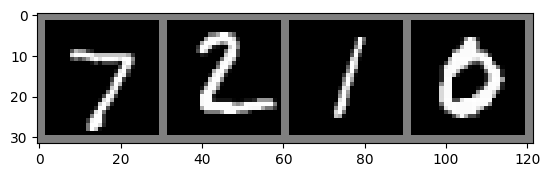

True Labels:  7 - seven 2 - two 1 - one 0 - zero
Predicted:    7 - seven 2 - two 1 - one 0 - zero


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Predict labels
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Print the images with true and predicted labels
imshow(torchvision.utils.make_grid(images))
print('True Labels: ', ' '.join('%5s' % trainset.classes[labels[j]] for j in range(4)))
print('Predicted:   ', ' '.join('%5s' % trainset.classes[predicted[j]] for j in range(4)))

## **TODO: Exercise 1 -  Two-Layer Neural Network**

* Now we are going to spice it up a little and implement a neural network with two hidden layers. The rest of the code (data loading, loss function definition, optimizer, training loop, etc.) will remain the same as before. The added hidden layer provides the model with additional capacity to learn more complex relationships in the data. However, it also introduces more parameters, which might increase the risk of overfitting if not regularized or if trained on a small dataset.


This Neural Network will have the following properties:

* Input Layer: This layer will flatten the image (28x28 pixels) into a 784-dimensional vector.
* First Hidden Layer: 500 neurons with a ReLU activation function.
* Second Hidden Layer: 250 neurons with a ReLU activation function.
* Output Layer: 10 neurons (one for each digit from 0 to 9). This will not have an activation function because we're using the CrossEntropyLoss, which implicitly applies the softmax function.




In [8]:
# Implement the class TwoLayerNet as described above.

class TwoLayerNet(nn.Module):
    def __init__(self):

        # TwoLayerNet is a subclass of nn.Module. In PyTorch, custom neural network architectures are created by subclassing nn.Module.
        # nn.Module itself has an __init__ method that sets up some internal functionalities required for the neural network. Before we
        # add our custom initialization (like defining layers) in our subclass (TwoLayerNet), we need to ensure that the initialization
        # of the parent class (nn.Module) has been completed.
        super(TwoLayerNet, self).__init__()

        # Input to First Hidden Layer
        # Write your code here
        self.fc1 = nn.Linear(28 * 28, 500)

        # First Hidden to Second Hidden Layer with 500 neuron inputs and 250 outputs
        # Write your code here
        self.fc2 = nn.Linear(500, 250)

        # Second Hidden to Output Layer
        # Write your code here
        self.fc3 = nn.Linear(250, 10)
        #pass # delete this line after implementing the __init__

    def forward(self, x):
      # Flatten the input images
      # Write your code here
      x = x.view(-1, 28 * 28)

      # First hidden layer with ReLU activation
      # Write your code here
      x = torch.relu(self.fc1(x))

      # Second hidden layer with ReLU activation
      # Write your code here
      x = torch.relu(self.fc2(x))

      # Output layer
      # Write your code here
      x = self.fc3(x)

      return x

# Instantiate the model
two_layer_net = TwoLayerNet()

## **EXercise 2 - Define Loss Function and Optimizer**
Use Cross Entropy Loss and the SGD optimizer, as before.

In [9]:
# Write your code here
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # in SGD, momentum is a hyperparameter that helps accelerate convergence and mitigate oscillations in the updates of weights.


## **Exercise 3 - Train the Model**

For visualization purposes, we'll keep track of the loss values in a list.

[Epoch 1, Mini-batch 2000] loss: 0.052
[Epoch 1, Mini-batch 4000] loss: 0.052
[Epoch 1, Mini-batch 6000] loss: 0.049
[Epoch 1, Mini-batch 8000] loss: 0.052
[Epoch 1, Mini-batch 10000] loss: 0.061
[Epoch 1, Mini-batch 12000] loss: 0.048
[Epoch 1, Mini-batch 14000] loss: 0.059
[Epoch 2, Mini-batch 2000] loss: 0.035
[Epoch 2, Mini-batch 4000] loss: 0.046
[Epoch 2, Mini-batch 6000] loss: 0.047
[Epoch 2, Mini-batch 8000] loss: 0.046
[Epoch 2, Mini-batch 10000] loss: 0.052
[Epoch 2, Mini-batch 12000] loss: 0.048
[Epoch 2, Mini-batch 14000] loss: 0.042
[Epoch 3, Mini-batch 2000] loss: 0.043
[Epoch 3, Mini-batch 4000] loss: 0.038
[Epoch 3, Mini-batch 6000] loss: 0.037
[Epoch 3, Mini-batch 8000] loss: 0.042
[Epoch 3, Mini-batch 10000] loss: 0.035
[Epoch 3, Mini-batch 12000] loss: 0.037
[Epoch 3, Mini-batch 14000] loss: 0.041
[Epoch 4, Mini-batch 2000] loss: 0.026
[Epoch 4, Mini-batch 4000] loss: 0.028
[Epoch 4, Mini-batch 6000] loss: 0.036
[Epoch 4, Mini-batch 8000] loss: 0.034
[Epoch 4, Mini-b

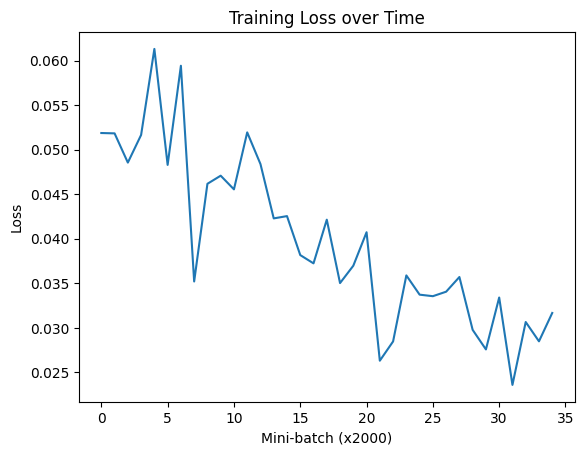

In [10]:
import matplotlib.pyplot as plt

num_epochs = 5
loss_values = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            avg_loss = running_loss / 2000
            print(f"[Epoch {epoch + 1}, Mini-batch {i + 1}] loss: {avg_loss:.3f}")
            loss_values.append(avg_loss)
            running_loss = 0.0

print("Finished Training")

# Visualization of the training loss
plt.plot(loss_values)
plt.xlabel('Mini-batch (x2000)')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.show()


## **Exercise 4: Test the Model**


In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10,000 test images: {100 * correct / total:.2f}%")


Accuracy of the network on the 10,000 test images: 97.66%


## **Non-Exhaustive List of Resources to Master PyTorch**

* [PyTorch Official Tutorials](https://pytorch.org/tutorials/): This is the official website for PyTorch tutorials. They offer a wide range of tutorials, from beginner to advanced levels.
* [Deep Learning with PyTorch](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html): This is one of the official beginner-friendly introductions to PyTorch. It covers the basics in an hour.
* [PyTorch Fundamentals](https://pytorch.org/tutorials/beginner/nn_tutorial.html): This is a set of tutorials created by Yann LeCun, one of the pioneers of deep learning. It covers the basics and fundamentals of PyTorch.
* [Intro to Deep Learning with PyTorch](https://www.udacity.com/course/deep-learning-pytorch--ud188): Udacity offers a free course on deep learning using PyTorch. It's interactive and includes video lectures.
* [Introduction to Deep Learning with PyTorch](https://www.coursera.org/learn/deep-neural-networks-with-pytorch): This is a course on Coursera that dives deep into neural networks, deep learning, and PyTorch.
* [PyTorch Tutorial for Beginners](https://www.youtube.com/playlist?list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4): This is a YouTube playlist that covers PyTorch from the basics to more advanced topics.
* [Official Documentation](https://pytorch.org/docs/stable/index.html): Always a good idea to get acquainted with the official documentation, as it's a comprehensive resource on all PyTorch functions and modules.